In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
train = pd.read_csv('C:\\Users\\ACER\\Downloads\\train.csv')
test = pd.read_csv('C:\\Users\\ACER\\Downloads\\test.csv')

In [3]:
train.keys()

Index(['S/N', 'Gender ', 'Age', 'Location ', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel',
       'freetime', 'health', 'absences', 'Scores'],
      dtype='object')

In [4]:
train_copy = train.copy()
test_copy = test.copy()
test = train_copy
# Gender
test['Gender '][test['Gender ']== 'F'] = 0
test['Gender '][test['Gender '] == 'M'] = 1

# setting urban to 0 and rural to 2
test['Location '][test['Location ']== 'U'] = 1
test['Location '][test['Location ']== 'R'] = 0

# setting the famsize 
test['famsize'][test['famsize'] == 'LE3'] = 0 # less than 3
test['famsize'][test['famsize'] == 'GT3'] = 1 # greater than 3

# Pstatus
test['Pstatus'][test['Pstatus'] == 'T'] = 1 # living together
test['Pstatus'][test['Pstatus'] == 'A'] = 0 # living Apart

# paid
test['paid'][test['paid'] == 'yes'] = 1 # yes
test['paid'][test['paid'] == 'no'] = 0 # no

# activities
test['activities'][test['activities'] == 'yes'] = 1 # yes
test['activities'][test['activities'] == 'no'] = 0 # no

# nursery
test['nursery'][test['nursery'] == 'yes'] = 1 # yes
test['nursery'][test['nursery'] == 'no'] = 0 # no

# higher
test['higher'][test['higher'] == 'yes'] = 1 # yes
test['higher'][test['higher'] == 'no'] = 0 # no

# internet
test['internet'][test['internet'] == 'yes'] = 1 # yes
test['internet'][test['internet'] == 'no'] = 0 # no

# schoolsup
test['schoolsup'][test['schoolsup'] == 'yes'] = 1 # yes
test['schoolsup'][test['schoolsup'] == 'no'] = 0 # no

# famsup
test['famsup'][test['famsup'] == 'yes'] = 1 # yes
test['famsup'][test['famsup'] == 'no'] = 0 # no

count = 1    
for i in range(len(test['S/N'])):
    test['S/N'][i] = count
    count += 1

print (test.head())

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be se

  S/N Gender   Age Location  famsize Pstatus  Medu  Fedu  traveltime  \
0   1       0   13         1       1       0     4     4           2   
1   2       0   12         1       1       1     1     1           1   
2   3       0   10         1       0       1     1     1           1   
3   4       0   10         1       1       1     4     2           1   
4   5       0   11         1       1       1     3     3           1   

   studytime   ...    paid activities nursery higher internet famrel freetime  \
0          2   ...       0          0       1      1        0      4        3   
1          2   ...       0          0       0      1        1      5        3   
2          2   ...       1          0       1      1        1      4        3   
3          3   ...       1          1       1      1        1      3        2   
4          2   ...       1          0       1      1        0      4        3   

  health  absences  Scores  
0      3         6      17  
1      3         4    

In [33]:
file = test.head(100)
#from sklearn.linear_model import LinearRegression
#lr = LinearRegression(normalize = True)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(file,file['Scores'], random_state = 0)


In [34]:
help (train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int, or None (default is None)
        If float, should be between 0.0 and 1.0 and represent the
        proportion of the dataset to include in the test split. If
        int, represents the absolute number of test samples. If None,
        the value is automatically set to the complement of the train size.
    

In [47]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 1)

In [48]:
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [49]:
clf.predict(X_test)

array([33, 24, 26, 32, 32, 27, 42, 43, 32, 27, 28, 22, 29, 34, 17, 33, 42,
       28, 33, 46, 21, 28, 44, 33, 21], dtype=int64)

In [52]:
x = clf.score(X_train, Y_train)
y = clf.score(X_test,Y_test)

print (x,y)

1.0 0.12


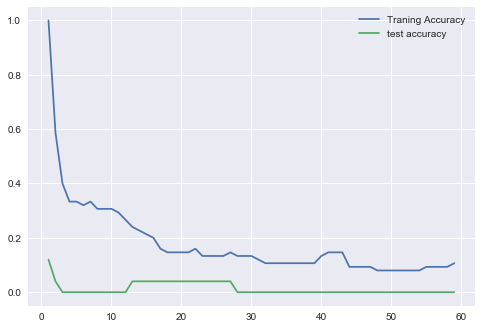

In [40]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,60)

for n_neighbors in neighbors_settings:
    # build model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, Y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train, Y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, Y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = 'Traning Accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'test accuracy')

plt.legend()
plt.show()

In [91]:
# using the knn regression a regression form of k nearest neighbors algorithm

fdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeEAAAFJCAYAAACsBZWNAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xd4lfX9//HnGTkn5+RkQsLMIIEIyAgBBZTgxIETUQEt+qu2frG2VkXrpoiUIdZqXbWOqrigCAgoFlGUoYKMAEGmCWFDBiN7nfP7I5BKORgISe4zXo/r6nX1nPuc+7zz9pBXPvf4fEwej8eDiIiINDuz0QWIiIgEK4WwiIiIQRTCIiIiBlEIi4iIGEQhLCIiYhCFsIiIiEGszf2BeXlFp/2e6GgnBw+WNkE1/k198U598U598U598U598a6hfYmNDff6vF+MhK1Wi9El+CT1xTv1xTv1xTv1xTv1xbvG7otfhLCIiEggUgiLiIgYRCEsIiJiEIWwiIiIQRTCIiIiBlEIi4iIGEQhLCIiYpBmn6xDRER8z4sv/o3NmzdSWFhAeXk5SUmJOJ3hjB8/ucH7nDr1bXr37kPXrt3OqLb333+H6dM/YPr0Odjt9jPal685pRBeu3Ytzz77LFOnTj3u+a+++oqXX34Zq9XK0KFDufnmm5ukSBERaVp/+MP9AHz22Vxyc7czZsxjDZrh8OdGjvx/jVAZLFgwn0suuYwvv1zA4MHXNMo+fUW9Ifz6668zZ84cHA7Hcc9XVVUxceJEZsyYgcPhYMSIEVx88cW0bNmyyYoVEQkG07/axg+bDjTqPs/pHMfNF3c87fetXr2SV199kZCQEK69dgh2u52ZM/9NdXU1JpOJCROeJTt7G++//y4hIVb27NnNJZdcxu2338lf/jKWSy65jMLCAr77bhkVFeXs3r2LW2+9ncGDr+HHH7N47rlncDqdREdHY7PZefzxsSd8ftu27bn++qGMGzemLoQ3bMji73//K263m9jYOP7856fZtm3bCc+NHn0vDz30GImJScyePYOCggIGD76Ghx++n4iISPr3P5+uXbvxr3+9jtvtpqysjD//eTwJCYm8/fYbLFnyDTU1NVx//VBMJhMFBfu4447fUVNTw69/fQuvv/7uGY3O6z0nnJCQwIsvvnjC8z/99BMJCQlERkZis9no3bs3P/zwQ4MLaYiKyhqWrd9LZVVNs36uiEgwqays5JVX3uCKK65i584dTJnyAq+++iZJSR1YseI7APbv38v48c/w2mtv88EH756wj5KSYp555nkmTXqO9957G4Bnn53IY4/9mb///R+0bdve62fPm/cJ11xzPQkJSYSEhLBhQxYAU6ZM4NFHx/D66+9w3nnns337dq/PnUxhYQF/+9vL3Hrr7eTkZDNmzNO89NI/ueCCi1i0aCFbtmxi+fJv+ec/3+b1199h584dDBp0OV9++SU1NTUsX/4d6el9zvjweL0j4csvv5xdu3ad8HxxcTHh4f+dkDosLIzi4uJ6PzA62tmguTe9TX69ZM1u3vx0I9FRTi5I9/4fMNCdbFLwYKe+eKe+eOdrfblnWC/DPjs8PBSn0wbU9iUqykmnTil1PUpIaMuUKU8TFhbGjh059O9/LlFRTrp06UybNtEAOBwOYmPDCQ0NITLSQVVVKD16dCM2NpyIiI7U1FQTGxtOYWEBffumATBw4Hl89tlnx/23OHz4MMuXf0tJyRHmzJlBRUUZn346kwsv7M+hQ4Wcc04PAH7965EAXp977TUr0dFOYmPDCQuzU15uJyYmjPj4eNq2jQEgJSWBV199HqfTyf79+0lPT+fQoQOkp/eidesoAMaNGwPAOeecw+bNa/nyy/n87ne/O+PvToMvzHK5XJSUlNQ9LikpOS6UT6ahq094OzdRUlIOwO59R8743IU/Ollfgp364p364p36cryionJKSyuB2lXvDh0qpaqqhry8IoqLi3n++Rf4+ON5ANx//z0cOVJGWFgplZXVdX10uz3k5RVRXl7F4cNlFBWVU1ZWRV5eERUVFdTUuMnLK6JlyzhWrFhLhw7JfPvtCsrLq477bzFjxnQGD76We+75IwDl5eXcdNO1bNmyg5iYFqxevYH4+ATee+9t4uMTvT4HFrZt20FERByrV6+lZctYCgtLqKnx1H3W448/wfTps3E6wxg//s+UlFQQHd2KtWvXs3//YdxuNw8+eC/PPPM8N998My+99CqHDx+iRYt2p/zdOVlYNziEU1JSyM3N5dChQzidTlauXMmdd97Z0N01iNNeW35pRXWzfq6ISDAKCwuje/eejBr1aywWK+Hh4eTn59GmTdsG7W/06IeZOHEcDoeTkBArsbFxx22fO/cTnnxyXN3j0NBQLrjgYubOncVDDz3GxInjMJvNtGjRgptvvoW4uLgTnrPZQvjrXyfRqlVrWraM9VrH5Zdfye9+91scjlCio1uQn59Hp05n0bdvf+6++07cbjdDhtyIzWajZ8+e7N69kyFDbmrQz/y/TB6Px1Pfi3bt2sUDDzzA9OnTmTt3LqWlpQwbNqzu6miPx8PQoUO59dZb6/3AhvzFebK/VHP3FfHU2z8wqE88Iy7tdNr79Xf6C9479cU79cU79cW75ujLxx9P5+KLBxEdHc0///kKISEh/PrXv23SzzxTLVqEceONN/Pccy8SFuY65fed0Ui4ffv2TJ8+HYBrrvnv5eEXX3wxF1988SkX0dgcocdGwlWG1SAiIg0TExPDAw/cg8PhxOVynXBltK/Zs2c3v/nNw1x22VWnFcC/xK8n66g7HF2uw9EiIv7moosu5aKLLjW6jFPWtm07Pvnkk0Y9QuDX01Y67LVXWZfpnLCIiPghvw5hi9lMqM2iC7NERMQv+XUIAzhDrTocLSIifsn/Q9hu1eFoERHxSwERwqUV1bjrv9NKREROoqKigrlzZ5/2+zIzV7Nt29YmqCg4+H0IO+xWPJ7aeaRFRKRhCgsLGhTCn346h/z8vCaoKDj49S1KUHtOGGpvU3LY/f7HERFh5rZ5rDmwvlH32SuuOzd0vPqk29999y22b8/hX/96nZtuGsHTTz/OgQP5ANx330OkpHRkwoSn2LVrJxUVFdx003CSkpJZvvw7tmzZRFJSMq1btwagpqaGKVMmcODAfgoK8jn//IHcddfv2LlzB5Mnj6eqqorQ0FDGjp1AcXHRCc+98soLXHLJZfTrdx7ff/8tX365gMcfH8vQoVeTmJhEUlIHrr76Ol588W+43W4OHTrEgw8+QvfuPZk3bzazZn2M213DgAEX0L17T+bMmVW3LvLdd9/B009PPunsWc3N71PLaQ8BaqeubGFwLSIi/uq22+7gp5+28etf/5ZXXvk7/fr1Y9Cga9i5cwcTJjzFX//6dzIzV/Paa29jMplYseJ7OnfuQt++/bnkksvqAhjgwIH9nH12dx555EkqKiq44YbB3HXX73j55ef51a/+H/36ncfSpd+wdetmZs6cfsJzJ3PgwH7eeus9IiOj+PLLBfz+9/eTktKRBQs+57PP5tK+fTzvvfcO77zzITabnX/84yW6devO889P4ciRI+Tn5xEZGeUzAQwBEMJ1s2aVa9YsEQkMN3S8+hdHrU0tO3sb69at5pNP5gJQVHQEpzOMe+8dzTPP/IXS0hIuu+zKk74/IiKCjRs3sHr1SsLCwqisrP39vGNHLt261a5yNGDABQA8//yUE5774ovP6/b185mVIyOjiIysXdWoZcs43n77Dex2O6WlpYSFhbF79246dEjBbg8F4O67/wDAZZddycKF/2HPnt1cffV1Z96gRuT3IaxFHEREzpzJZMbjcQOQmJjEOeek06/fhRw8WMjcubPJz89n8+aNTJz4LBUVFQwdehWXXz4Yk8lU975jPvtsHi5XOH/60+Ps2rWTOXNm4fF4SEzswMaNGzjnnL4sWDCfI0cOe33OZrNRUFB7KHzLlk11+zWb/3sZ0wsvTGHMmPEkJXXgzTdfY+/ePbRr154dO7ZTWVmJzWbjiSf+xB//+CBXXXUt48Y9SXl5GaNG/b4Zunnq/D+EQzV1pYjImYqOjqaqqppXXvk7t912B889N5H33vuA0tIS7rjjLlq0aEFhYQGjRt2B2Wxm+PBfYbVa6dq1G//4x0u0adOOpKQOAPTufQ5PPfUEGzasJyQkhPbt48nPz+Oee/7IlCkTeOedNwkNDWXMmKfp1+/8E57bs2c3EyeOY8GCz4mPT/Ba72WXXcmTTz5MeHgEsbFxHD58iOjoaG699XZ+//u7MJlMnH9+Rt3KTE6nk7PP7o7V6luxd0qrKDWmxlxFCWDlpgO8MjuLEZd2YlCf+DMtz69o9Rfv1Bfv1Bfv1BfvAq0vf/rTfdx772jatz+znGhoX062ipLf36J0bCRcppGwiIj8j4qKcu6441ckJnY44wBuCr41Lm+AusPROicsIiL/w24P5a233jO6jJPy/5GwljMUERE/5f8hHPrf+4RFRET8id+H8LE1hXWfsIiI+Bu/D2GL2YxdawqLiIgf8vsQhqMrKemcsIiI+JnACOFQrSksIiL+JzBC+Oiaws0874iIiMgZCZgQ9nigXGsKi4iIHwmMED42a5YOSYuIiB8JiBB2aMIOERHxQwERwpq6UkRE/FFghLD96KxZGgmLiIgfCYwQrhsJa9YsERHxH4ERwjonLCIifiggQtihc8IiIuKHAiKENRIWERF/FBghrJGwiIj4ocAI4aMj4TKNhEVExI8ERAjXTdahkbCIiPiRgAhhq8WMPcSic8IiIuJXAiKEofa8sO4TFhERfxI4IWy3aiQsIiJ+JWBC2BGqNYVFRMS/BEwIa01hERHxN4ETwlpTWERE/EzghLBuUxIRET8TOCEcqqkrRUTEvwROCB9bU1gjYRER8RMBE8IOuwXQ1JUiIuI/AiaEnaEaCYuIiH8JnBCuW85Qs2aJiIh/CJwQ1nKGIiLiZ+oNYbfbzZgxYxg2bBgjR44kNzf3uO1z5sxhyJAhDB06lA8++KDJCq3Pf0fCCmEREfEP1vpesHDhQiorK5k2bRqZmZlMmjSJV199tW77M888w7x583A6nVx11VVcddVVREZGNmnR3jg0EhYRET9TbwivWrWKjIwMANLS0sjKyjpu+1lnnUVRURFWqxWPx4PJZGqaSuuhkbCIiPibekO4uLgYl8tV99hisVBdXY3VWvvWTp06MXToUBwOB4MGDSIiIuIX9xcd7cRqtZx2obGx4fW+xm6zUFXjPqXXBopg+llPh/rinfrinfrinfriXWP2pd4QdrlclJSU1D12u911Abxp0ya+/vprvvzyS5xOJw899BDz58/nyiuvPOn+Dh4sPe0iY2PDycsrqvd1DpuFI8WVp/TaQHCqfQk26ot36ot36ot36ot3De3LyYK73guz0tPTWbx4MQCZmZmkpqbWbQsPDyc0NBS73Y7FYiEmJoYjR46cdnGNxRkaonPCIiLiN+odCQ8aNIhly5YxfPhwPB4PEyZMYO7cuZSWljJs2DCGDRvGLbfcQkhICAkJCQwZMqQ56vbKabeyr6DU0HPTIiIip6reEDabzYwbN+6451JSUur+/4gRIxgxYkTjV9YAzlArbo+HiqoaQm31/mgiIiKGCpjJOkBXSIuIiH8JqBDWvcIiIuJPAiqENRIWERF/ElghfHQkXKaRsIiI+IHACmG7DkeLiIj/CKwQPramsA5Hi4iIHwisENZIWERE/EhAhbDjaAiXaSQsIiJ+IKBC2Fl3i1KVwZWIiIjUL7BCWLcoiYiIHwmoEHbonLCIiPiRgArhEKsZm9WskbCIiPiFgAphqJ26UiNhERHxBwEXwk67VSNhERHxC4EXwqFWyiqq8Xg8RpciIiLyiwIvhO0h1Lg9VFa5jS5FRETkFwVeCGs5QxER8ROBF8J19wprwg4REfFtgRfCGgmLiIifCLwQ1qxZIiLiJwIuhB0aCYuIiJ8IuBDWSFhERPxF4IXw0ZFwmUbCIiLi4wIvhO0hgA5Hi4iI7wu8EA7V4WgREfEPARfCWs5QRET8RcCFsNNuAaBMk3WIiIiPC7gQDrFaCLGaNRIWERGfF3AhDFrOUERE/ENghnCoVSNhERHxeYEZwkdHwlpTWEREfFlAhrAj1Fq7pnC11hQWERHfFZAhrKkrRUTEHwRmCIdq1iwREfF9gRnCR0fCZRoJi4iIDwvMEK5bzlATdoiIiO8KzBDWOWEREfEDgRnCoZo/WkREfF9ghrBGwiIi4gcCMoQdGgmLiIgfCMgQrrs6WiEsIiI+LDBD+Nh9wjocLSIiPiwwQ/jomsI6HC0iIr4sIEO4bk1hjYRFRMSHBWQIAzjsWs5QRER8W8CGsNNupaxcM2aJiIjvstb3ArfbzdixY9m8eTM2m43x48eTmJhYt33dunVMmjQJj8dDbGwsU6ZMwW63N2nRp8IZaiX/cBkejweTyWR0OSIiIieodyS8cOFCKisrmTZtGqNHj2bSpEl12zweD08++SQTJ07kww8/JCMjg927dzdpwafKabdSXeOhSmsKi4iIj6p3JLxq1SoyMjIASEtLIysrq25bTk4OUVFRvP3222zdupULLriA5OTkpqv2NPx86kpbiMXgakRERE5UbwgXFxfjcrnqHlssFqqrq7FarRw8eJA1a9YwZswYEhISGDVqFN26daN///4n3V90tBOr9fRDMTY2/LReHxPlBCDUaT/t9/qTQP7ZzoT64p364p364p364l1j9qXeEHa5XJSUlNQ9drvdWK21b4uKiiIxMZGUlBQAMjIyyMrK+sUQPniw9LSLjI0NJy+v6LTeY/LUHobetfcwoQF6+VlD+hIM1Bfv1Bfv1Bfv1BfvGtqXkwV3vfGUnp7O4sWLAcjMzCQ1NbVuW3x8PCUlJeTm5gKwcuVKOnXqdNrFNQUt4iAiIr6u3pHwoEGDWLZsGcOHD8fj8TBhwgTmzp1LaWkpw4YN4y9/+QujR4/G4/HQq1cvLrzwwmYou37Hpq4s0W1KIiLio+oNYbPZzLhx44577tjhZ4D+/fszY8aMxq/sDEWH194mVXik3OBKREREvAvQs6XQKtoBwP6DZQZXIiIi4l3AhnDLSAcmIE8hLCIiPipgQzjEaiY6ws6BQwphERHxTQEbwgBxUQ4OFlVQWVVjdCkiIiInCOwQPnpeOO+wLs4SERHfE9AhHBt1NIR1XlhERHxQQIdwq+jaqSt1XlhERHxRQIfwsZHwgQZMlSkiItLUAjqEj50T1khYRER8UUCHsMNuxeUI0TlhERHxSQEdwlA7c1b+4XJq3G6jSxERETlOwIdwbLSDGreHwiMVRpciIiJynIAP4bgonRcWERHfFPghHK17hUVExDcFfghHHb1XWCEsIiI+JuBDOFa3KYmIiI8K+BCOcIZgD7FoJCwiIj4n4EPYZDIRF+0g71AZHo/H6HJERETqBHwIQ+0V0hVVNRwpqTS6FBERkTpBEcI6LywiIr4oKEK4bg5pnRcWEREfEhwhHKUQFhER3xNUIZynw9EiIuJDgiKEYyJCsZhNOicsIiI+JShC2Gw20TLKocPRIiLiU4IihKH2kHRxWRWl5dVGlyIiIgIEWQiDzguLiIjvCJ4Q1r3CIiLiY4ImhOsm7DhYanAlIiIitYImhHWvsIiI+JqgCeHYqFBM6JywiIj4jqAJ4RCrhegIO/s1EhYRER8RNCEMtYekDxVVUFVdY3QpIiIiQRbC0Q48QN6hcqNLERERCa4QjtXFWSIi4kOCKoTjop2A7hUWERHfEFwhfGzWLI2ERUTEBwRVCNcdjtZIWEREfEBQhbAz1IrLEaJZs0RExCcEVQhD7RXS+YfLcbs9RpciIiJBLihDuMbtofCIblMSERFjBV8IHz0vvF/nhUVExGBBF8KxukJaRER8RNCFcCvdKywiIj4i6EL4v+sKK4RFRMRYQRfCEc4Q7CEWhbCIiBiu3hB2u92MGTOGYcOGMXLkSHJzc72+7sknn+TZZ59t9AIbm8lkIjbKQd6hMjwe3aYkIiLGqTeEFy5cSGVlJdOmTWP06NFMmjTphNd89NFHbNmypUkKbAqtoh1UVNVwpLTK6FJERCSI1RvCq1atIiMjA4C0tDSysrKO27569WrWrl3LsGHDmqbCJvDf88KaOUtERIxjre8FxcXFuFyuuscWi4Xq6mqsVisHDhzg5Zdf5qWXXmL+/Pmn9IHR0U6sVstpFxobG37a7zmZjgkxsHwH+UWVnNeI+zVCY/YlkKgv3qkv3qkv3qkv3jVmX+oNYZfLRUlJSd1jt9uN1Vr7ts8//5yDBw9y1113kZeXR3l5OcnJydxwww0n3d/BBow+Y2PDycsrOu33nUzH1i4sZhOff7edfp1jMZlMjbbv5tTYfQkU6ot36ot36ot36ot3De3LyYK73hBOT09n0aJFDB48mMzMTFJTU+u23Xbbbdx2220AzJw5k+zs7F8MYF8REWajZ8eWrN6SR+7+IpJaRxhdkoiIBKF6zwkPGjQIm83G8OHDmThxIo8++ihz585l2rRpzVFfkxnQow0AS9btNbgSEREJVvWOhM1mM+PGjTvuuZSUlBNe5w8j4J/rnhxDpMvG9xv2M+yijthCTv88tYiIyJkIusk6jrGYzQzo3oayimpWbckzuhwREQlCQRvC8LND0mv3GFyJiIgEo6AO4VbRTs6Kj2LTjkO6Z1hERJpdUIcwQEbP2tHw0vW6QEtERJpX0Idw77PicNgtLFu/D7dbc0mLiEjzCfoQtodY6NulFQeLKsjKKTC6HBERCSJBH8IAGT3bArpnWEREmpdCGEhqHU772DAyt+ZzpLTS6HJERCRIKISpXWM4o0dbatwevsvaZ3Q5IiISJBTCR/Xv1hqrxcSSdXvxeHSBloiIND2F8FEuRwhpnWLZk19C9p4jRpcjIiJBQCH8MwPrFnXQDFoiItL06l3AIZh0TYohJsLO8o0H6HNWHCbziesM26xmUtpGYvay7WSqa9zsyS8hPs7lt2sXi4hI41MI/4zZbGJA9zbMWbad56avPenr2rRwcn1GMr3PisX8C6HqdntY/uN+Plmaw4FDZVyU3o5fDUpVEIuICKAQPsHl5yYQarNSVV3jdfuBg2V8t2E/r87OIiHOxZCByfRIaXFcsHo8HlZvyWP2khx255dgMZuIDrezaPVubFYzN1/UUUEsIiIK4f/lsFu5om/CL77m6vOS+GRpDst/3M8LM9aR0i6CGzKS6ZwYzfrsQmYtziZ3fxEmEwzo3oZrz0/CFmJh8ger+c+KnYRYLdwwMLmZfiIREfFVCuEGaBXj5K5rz2Zw/0Q+WZLDqi15TPkok5gIO4VHKgA4t0sc1w3oQJsWYXXve3B4Lya/v5p5327HZjVz9XlJBv0EIiLiCxTCZ6B9rIt7bujO9n1HmLk4m6zsQnp1asn1GcnEx7lOeH10uJ2HRvRi0vurmbk4G5vVzGXn/vKoW0REApdCuBEktY7ggZvTcLs99V413SIylIdGpDHp/dV89NU2QqxmLkpv30yVioiIL9F9wo3oVG9biot28tCIXkQ4Q5i6YAtL1u6hxu0+7f9p6UUREf+mkbBB2rQI48ERvXjmgzX8a/4m/jV/02nvw2oxM6BHG67un0hMRGgTVCkiIk1JIWyg9rEuHhyexidLcyiv9H5L1C8pLKrg6zW7WbpuLxent2Nwv0QiwmxNUKmIiDQFhbDBElqF84ehPRr03piYMD75eitzlm5nwQ87+SZzD5f2ac8VfRMICw1p5EpFRKSxKYT9mMViJqNHW/p1bc3itXuY9+12Pv0ul69W7+aKc+O5sl8iVotO+4uI+Cr9hg4AIVYzl/Ruz6RR/bn5oo5YzCZmLcnhH59soLrGbXR5IiJyEgrhAGIPsXBF3wQmj+pP54QoVm/J4415P+oqahERH6UQDkAOu5V7b+xBx/aRrNh4gH/N34jboyAWEfE1CuEAFWqzcv9NPenQJpxl6/fx/oIteBTEIiI+RSEcwBx2K/ffnEZ8nItFa3Yz7attCmIRER+iEA5wLkcIo4en0bZlGAt+2MnMxdlGlyQiIkcphINAhNPGg8PTiIt28Ol3ucxdlmN0SSIigkI4aES57PxpRC9aRoYya0kOny/fYXRJIiJBTyEcRGIiQnloRC+iw+1MX7SNL1ftMrokEZGgphAOMrFRDh4a0YvIMBvvf7GFxWv3GF2SiEjQUggHodYxTh4cnobLEcI78zfxXdY+o0sSEQlKCuEg1e7oCk4Ou5U3Pv2RlZsOGF2SiEjQUQgHsYRW4TwwLA17iIXX5mwgc2u+0SWJiAQVhXCQS24bwX039cRiMfHK7PVkZRcYXZKISNBQCAup8VHcO7QHYOLFmev59LvtVFTWGF2WiEjAUwgLAF2TYvjD0O7YrGY+/iabh//xLV/8sJOqaoWxiEhTUQhLne7JLZg8qj/Xnp9ERbWbD7/cyiOvfc83mbu1LrGISBNQCMtxnKEhXJ+RzDOj+nPFuQkUl1XxzuebeeL15XyXtU9rE4uINCKFsHgV7rRx88UdmTyqPxent6PgSDmvz/uRMW+tYOWmA1qNSUSkEViNLkB8W5TLzq8uO4sr+iYwZ9l2lq3fyyuzs0hsFc6Qgcl0T47BZDIZXaaIiF9SCMspaRnp4I7BXRjcL5HZS7JZsfEAz/97LR3bR3JDRjKdE6ONLlFExO8ohOW0tI5xMuq6blzVv5jZS7JZszWfZz5cQ5fEaG4YmExKu0ijSxQR8RsKYWmQ+DgXfxjag5y9R5i5OJsNOYX8Zeoqeqa0YMjAZBJahRtdooiIz6s3hN1uN2PHjmXz5s3YbDbGjx9PYmJi3fZ58+bxzjvvYLFYSE1NZezYsZjNut4rWHRoE8HoYWls3nGQWYuzWftTAWt/KuCcznFcn9GBNi3CjC5RRMRn1ZuWCxcupLKykmnTpjF69GgmTZpUt628vJznn3+ed999l48++oji4mIWLVrUpAWLbzorIZqHb03ngZt7ktQ6nB82HeCJN5bz5rwfOXCozOjyRER8Ur0j4VWrVpGRkQFAWloaWVlZddtsNhsfffQRDocDgOrqaux2exOVKr7OZDLq5hgyAAAVZklEQVTRLbkFZ3eIIXNrPrOWZLMsax/f/7ifB4al0UUXb4mIHKfeEC4uLsblctU9tlgsVFdXY7VaMZvNtGzZEoCpU6dSWlrK+eef/4v7i452YrVaTrvQ2FidY/TGV/tyWVwEl/bvwDdrdvH8R2uYumAzLz54EaG25rkMwVf7YjT1xTv1xTv1xbvG7Eu9vxFdLhclJSV1j91uN1ar9bjHU6ZMIScnhxdffLHee0YPHiw97SJjY8PJyys67fcFOn/oS7eEKC4/J575y3fwxqx1DLu4U5N/pj/0xQjqi3fqi3fqi3cN7cvJgrvec8Lp6eksXrwYgMzMTFJTU4/bPmbMGCoqKnjllVfqDkuL/Ny1AzoQF+VgwQ87ydl7xOhyRER8Rr0hPGjQIGw2G8OHD2fixIk8+uijzJ07l2nTprFhwwZmzJjBli1buP322xk5ciRffPFFc9QtfsQeYuH2Kzvj8cC/PtukxSBERI6q93C02Wxm3Lhxxz2XkpJS9/83bdrU+FVJwOmSGM3Anm1YvHYvny/fwdXnJRldkoiI4XRDrzSbmy7qSGSYjTnLtrO3oKT+N4iIBDiFsDSbsNAQfnVZKtU1bt6evwm3VmISkSCnEJZm1fusOHqnxrJ112G+WbPb6HJERAylEJZmd8ugVBx2K//++icKj5QbXY6IiGEUwtLsosPtDLu4I+WVNby3YAseHzgs7fF4KC6rMroMEQkyCmExREaPNnROiCJzWz5/m77WsPuHPR4PG3IKGf/uKu59YQlfrNxpSB0iEpy0lKEYwmQy8Zuru/LmpxvJyikkK6eQ9NRYrs/oQPtYV/07aARbdh5i5uJstuw8BIDdZuHDhVsJsZq5MK1ds9QgIsFNISyGiYkI5aERvdi4vZCZi7NZvSWPNVvy6Nu1FdcN6ECrGGeTfG7O3iPMWpJNVnYhAD1SWjAkIxmr1czk91cz9fPNhFjMnN+9TZN8vojIMQphMVyXpBgeS4xm3U8FzFqczfc/7mfFxgOc2zWOmPDQ096f02mjtLTS67Y9+SVkbsuv/dzEaIZkJNOxfWTd9geHpzHlwzW89dlGQqxmzu3SqmE/1BnYdaCYzTsP0atTS2IiTv/nl8aRu6+IVVvycLtP/5qFMIeVQX3isVp0xk9+mUJYfILJZKJnx5Z0T2nB6s15zFqSzfcb9jfJZ6W0i+CGjGS6JMWcsC2hVTgPDEvj2Y/W8M85PxJiMdMrNbZJ6vhfewtK+GRpDj9sPIAHmPbVNi7q1Y7B/ROJDLM1Sw0Cu/OKmb0kh1Vb8s5oP6E2Kxf10mkN+WUmTzNfmtrQ1Se0mseJArkvbreHHQeKqK45/a9ndJSTg4e8r9ZlD7HQPjas3tW+tu46xHPT1lLjdvOHoT3ontzitOs4VfmHypizbDvLsvbi8UBiq3D6dI7l6zV7KDhSji3EzKA+8VzRN4Gw0JAGf04gf1/OxLG+7D9YyidLc1i+YT8eILltBFf1SyT8NP8Aqqyq4fl/ryPKZWPCXf38djSs74t3jb2KkkLYj6kv3jVWXzbmHuT5f68F4L4be3gdOZ+Jg0UVzPtuO4sz91Dj9tC2ZRhDMjqQnhqLyWSiusbN4rV7mPvtdg4XV+KwW7n83HgG9YnHYT/9g1j6vnjnsVp4Z24WS9ftw+3xEB/nYsjAZHqmtKj3j7WTeW/BZr5avZs7r+rit9cW6PvinUJY6qgv3jVmX9ZnF/Dix+vweCDM0fBRqDclZVXUuD3ERTm4LqMDfbu0wmw+8Zd+RVUNi1bv5rPvcykuq8IWYibUdvohHBYaQkaPNlyc3g5biKUxfgS/t3jtHt5bsIXqGjdtWji5PiOZ3mfFYm5g+B5TcLicR177jtgoB+N/09frf1dfp98v3imEpY764l1j92XttnxmLc6msrpxl2C0h1i4KL0d53VrfUqHLMsqqlm4cicrNh2gpgGH6Q+XVFBWUUOky8Y15yUxsGdbvz1U2hiWrd/Lm59uJCLMxk0XptD/7NaNGpZvfbaRpev2Muq6sw25wO9M6feLdwphqaO+eKe+eBcaZuf9z37ki5U7qaxy0yIilGsHJHFet9ZYzMEVxis27ue1ORtw2q1MvGcArpDG//n3F5by2Ovf066li6fuOKfBh7aNon9H3jV2CPv1vzyPx8POoj0+Me2hiK8Ld9oYekEKk0edx6A+8RwuqeRfn23iiTdWsPzH/UGzqtXqLXn8c86PhNosjB6eRoe2kfW/qQFaxTg5t0srduUVs3ZbQZN8hvg/vw7hDQWbmPTD8/ywf43RpYj4jcgwGyMu7cSk/+vHBWltyT9UxmtzNjD2rR9YszUvoP+oXfdTAa/OziLEaub+m9JIah3RpJ93Vf9EAOZ+uz2g+yoN59chHOdsCcCq/ZkGVyLif2IiQrn9is785bd96X92a3bnFfPix+sZ/+4qNuQUBlxobNxeyMuz1mM2m/jjjT2Om6SlqbSPdZGeGkvO3iP8mHuwyT9P/I+fh3AsbcNas6lwK2XVWhJPpCHiop389pqujPtNX/qcVRsYf52WyTMfrGHrrkNGl9cotuw8xAsfr8Pj8fCHod3pnBjdbJ999Xm1o+F5y7Y322eK//D7GbPS4rrzWc4XbCjYRJ9WaUaXI+K32rUM43dDupO7r4hZS7JZ91MBE99bTWp8FFEu/56xa91PBdTUeLhnSHe6dWi6iVe8SWodQbfkGLKyC9my8xCp8VHN+vly6txuDys27mdXXgnXZ3RolrsH/D+EY7vxWc4XZB5YrxAWaQSJrcO576aebNt1mJmLf2LTDv8fDYdYzfzftWeT1qmlIZ9/df8ksrILmffddh6I1+8pX+PxeFi9JZ/ZS7LZnV+C3Wbhir4JuBwK4Xq1DWtNrKMFGwo2UVlThc3SuBMqiASrju0j+dMt6RSVVjZoEQNfYrdZGjTBSWNJjY/irPgosrIL2b7vSJNfECanxuPxkJVTu4pb7r4iTCY4v3trrj2/A65GnpznZPw+hE0mE2mx3flix9dsLNxCz9izjS5JJKCEO/37ULSvuPq8JDZPy2Tusu2Muq5xf0+ZzaaAvte7usbd6BcKZu85wszF2WzddRiAc7vEcd2ADrRpEdaon1Mfvw9hgLS4bnyx42sy89YrhEXEJ3VNiqZDmwjWbM3n/579plH3bbOauSi9HVf2SyQigP5oytl7hFmLs8nKKWyyz0jr2JIhA5OJj3M12Wf8koAI4cTweKLskazP30i1uxqrOSB+LBEJICaTiVsHpTJnWU6jH97fnV/Cf1bs5OvMPbUrbp0bj/MMVtwy2q4Dxcxaks2arbVrfye1Dm/0w8NhjhAu7dOelCaarOVUBURa1R6S7sbXu5ax9WA2XVqkGl2SiMgJkttGcN9NPRt9v1XVbr7J3M2873KZ9+12vlq1iyv6JnBpn/aGngs/XfsKa5eTXPFj7XKSKe0iuGFgCl2a8Zay5uY//3XqkRbbna93LWNN3nqFsIgElRCrmUv7xJPRoy1frd7FZ9/nMnNxNl+s3Mkl6e0Jd57+KNIVHkpxUfPNv5Czt4hvs2qXk0xo5eKGgcl0T274cpL+ImBCOCUqCVdIGOvyNjD8rCGYTYF7kYKIiDd2m4Ur+yVyQVo7vli5k/+s2MHspTlGl3XK/ndN7WAQMCFsNpnpGXs2y/asIPtwLh2jOhhdkoiIIZyhVq4b0IFLerdnU+7BBi3OERHu4EhRWRNU553TbqVrUoxfrr18JgImhKH2kPSyPSvIPLBeISwiQc/lCKFP57gGvVdLGTaPgDpmmxqdgsMaSmZeVsBNPi8iIoEnoELYarbSvWVXDlYcYkfRLqPLERER+UUBFcJQO5c0QGZelsGViIiI/LKAC+EuManYzCFkHlivQ9IiIuLTAi6EbRYbZ7fozIGyfPaW7De6HBERkZMKuBCGnx+SXm9wJSIiIicXkCF8dssuWE0WnRcWERGfFlD3CR/jsIbSOaYTWQWbOFCaT5zTmIW8/U1JVSlLdn9HeXWF0aWcEcceG2WllUaXcUbCbS4y2vXX+tgiAS4gQxggPa4nWQWbmL99Ibd3HW50OT7P4/EwdeM01udvNLoUOepQxWGGdrrG6DJEpAkFbAj3aZXG17uWsmLfas5p1YuuLc4yuiSftvrAOtbnb6RTVDLXpQw2upwzEh3t5ODBUqPLOAMe3v1xGot2LqV3q54kRSQYXZCINJGADWGL2cKtnW9i8sq/8+HmmTx+7gOEWu1Gl+WTiqtK+PeWTwgxW7ml841+f/g+tkU4eW7/nm7vls5DeX7Na7y/cQYPn3Ov1sgWCVABeWHWMe3D2zIo4UIKyw8yL/s/Rpfjs2ZunUdRVTFXdbjM7wM4UHSKTuH8tn3ZU7KPL3K/MbocEWkiAR3CAFcmXUKcsyVf71pGzuFco8vxORsLtrB83yriw9txcXyG0eXIz1yfMphIWzifb1/IPt3zLhKQAj6EQywh3HLWjXjw8P6mGVS7q40uyWdU1FTy4eaPMZvM3Nr5Jixmi9Elyc84QxwMO2sI1Z4a3t/0MW6P2+iSRKSRBXwIA3SKTmZAu37sLdnPgtxFRpfjM+Zl/4eC8oNcmnAB8eFtjS5HvOgZ241esd3JPrydpbu/N7ocEWlkQRHCUHtoL8oeyefbv9J0lsD2IztYtHMpcY6WXJl0qdHlyC+4KfV6nFYHs3/6jIPlh4wuR0QaUb0h7Ha7GTNmDMOGDWPkyJHk5h5/XvWrr75i6NChDBs2jOnTpzdZoWfKYQ1lWOr11HhqeH/jjKA+tFftrub9jTPw4OGWzkM1IYSPi7SHc0PHq6moqeSjzbO0MIlIAKk3hBcuXEhlZSXTpk1j9OjRTJo0qW5bVVUVEydO5K233mLq1KlMmzaN/Pz8Ji34TPSIPZv0uB7kHMll8e7vjC7HMF/kfsOekn2c37YvnaJTjC5HTkG/Nn04K7ojWQUbWXVgrdHliEgjqffmw1WrVpGRUXvVbFpaGllZ/52P+aeffiIhIYHIyEgAevfuzQ8//MCVV17ZROWeuZtSr2NT4VY++Wk+2w7lGF3OGbHbrVRUnOaFZh4P6/N/JNIWwZCO/j0pRzAxmUzc0nko45c/x/TNsxs0L3qDvi9BQH3xLpj7EmWL4IZOV2M2Nf0Z23pDuLi4GJfLVffYYrFQXV2N1WqluLiY8PDwum1hYWEUFxf/4v6io51Yrad/FW5sbHj9LzqV/RDOXefcwkvL32HNgXWNsk9/Y7OEcHffX5HQJs7oUppMY31ffEks4dxeeSNvrZ4WtN9dkeYQarUzss/1uOxhXrc35u+XekPY5XJRUlJS99jtdmO1Wr1uKykpOS6UvWnIdIKxseHk5TXeDEidHGcxacAYv79dqUWLMAoKSup/4f8IMYcQarU3ak99SWN/X3xJr8hePJPRmWp3zWm/t6Hfl0CnvngXzH2xW2yUHXFTxom/Rxr6++VkwV1vCKenp7No0SIGDx5MZmYmqampddtSUlLIzc3l0KFDOJ1OVq5cyZ133nnaxRnBYQ01uoQzFhkaTqXNZHQZ0swcVkeD3qfvi3fqi3fqS/OoN4QHDRrEsmXLGD58OB6PhwkTJjB37lxKS0sZNmwYjzzyCHfeeScej4ehQ4fSqlWr5qhbRETE75k8zXy/Q0OH8YF6ePFMqC/eqS/eqS/eqS/eqS/eNfbh6KCZrENERMTXKIRFREQMohAWERExiEJYRETEIAphERERgyiERUREDKIQFhERMYhCWERExCAKYREREYM0+4xZIiIiUksjYREREYMohEVERAyiEBYRETGIQlhERMQgCmERERGDKIRFREQMYjW6gF/idrsZO3YsmzdvxmazMX78eBITE40uy1Br167l2WefZerUqeTm5vLII49gMpno1KkTf/7znzGbg+vvqqqqKh577DF2795NZWUld999Nx07dgz6vtTU1PDEE0+Qk5ODyWTiqaeewm63B31fjikoKOCGG27grbfewmq1qi/AkCFDcLlcALRv355Ro0apL8Brr73GV199RVVVFSNGjODcc89t1L74dEcXLlxIZWUl06ZNY/To0UyaNMnokgz1+uuv88QTT1BRUQHAxIkTue+++/jggw/weDx8+eWXBlfY/ObMmUNUVBQffPABb7zxBk8//bT6AixatAiAjz76iPvuu4+//e1v6stRVVVVjBkzhtDQUED/jgAqKirweDxMnTqVqVOnMnHiRPUFWL58OWvWrOHDDz9k6tSp7Nu3r9H74tMhvGrVKjIyMgBIS0sjKyvL4IqMlZCQwIsvvlj3eMOGDZx77rkADBw4kG+//dao0gxzxRVX8Mc//hEAj8eDxWJRX4BLL72Up59+GoA9e/YQERGhvhw1efJkhg8fTlxcHKB/RwCbNm2irKyMO+64g9tuu43MzEz1BVi6dCmpqancc889jBo1igsvvLDR++LTIVxcXFx3eATAYrFQXV1tYEXGuvzyy7Fa/3sGwePxYDKZAAgLC6OoqMio0gwTFhaGy+WiuLiYe++9l/vuu099OcpqtfLwww/z9NNPc80116gvwMyZM4mJian74x707wggNDSUO++8kzfffJOnnnqKBx98UH0BDh48SFZWFi+88EKT9cWnQ9jlclFSUlL32O12HxdCwe7n5yFKSkqIiIgwsBrj7N27l9tuu43rrruOa665Rn35mcmTJ/Of//yHJ598su40BgRvXz7++GO+/fZbRo4cycaNG3n44YcpLCys2x6sfenQoQPXXnstJpOJDh06EBUVRUFBQd32YO1LVFQUAwYMwGazkZycjN1uPy50G6MvPh3C6enpLF68GIDMzExSU1MNrsi3dO3aleXLlwOwePFi+vTpY3BFzS8/P5877riDhx56iBtvvBFQXwBmz57Na6+9BoDD4cBkMtGtW7eg78v777/Pe++9x9SpU+nSpQuTJ09m4MCBQd+XGTNm1F1zs3//foqLizn//PODvi+9e/dmyZIleDwe9u/fT1lZGf3792/Uvvj0Ag7Hro7esmULHo+HCRMmkJKSYnRZhtq1axcPPPAA06dPJycnhyeffJKqqiqSk5MZP348FovF6BKb1fjx45k/fz7Jycl1zz3++OOMHz8+qPtSWlrKo48+Sn5+PtXV1fz2t78lJSUl6L8vPzdy5EjGjh2L2WwO+r5UVlby6KOPsmfPHkwmEw8++CDR0dFB3xeAZ555huXLl+PxeLj//vtp3759o/bFp0NYREQkkPn04WgREZFAphAWERExiEJYRETEIAphERERgyiERUREDKIQFhERMYhCWERExCAKYREREYP8f8MTve3JDh9OAAAAAElFTkSuQmCCrom sklearn.neighbors import KNeighborsRegressor

# split wave dataset into a training and a test set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(file, file['Scores'], train_size = 0.30, random_state = 7)

In [92]:
# instantiate the model, set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors = 3)

# fit the model using the training data and the training target

reg.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [93]:
y_pred = reg.predict(X_test)

In [94]:
reg.score(X_test, Y_test)

0.79582414873075502

In [98]:
# Analyzing K nearest neighbors regression

fig, axes = plt.subplots(1,3, figsize = (15,4))
# create 1000 points, evenly spaced between -3, and 3

line = np.linspace(-3,3, 1000).reshape(-1,1)
plt.suptitle("nearest_neighbor_regression")

for n_neighbors, ax in zip([1,3,9], axes):
    # make predictions using 1,3,9 neighbors
    reg = KNeighborsRegressor(n_neighbors = n_neighbors).fit(X_train, Y_train)
    ax.plot(X_train,Y_train, 'o')
    ax.plot(X_train, -3 * np.ones(len(X_train)), 'o')
    ax.plot(line, reg.predict(line))
    ax.set_title("%d neighbor(s)" % n_neighbors)

ValueError: query data dimension must match training data dimension

In [3]:
import matplotlib


In [4]:
dir(matplotlib)

['RcParams',
 'URL_REGEX',
 'Verbose',
 '_DATA_DOC_APPENDIX',
 '__bibtex__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__version__numpy__',
 '_all_deprecated',
 '_color_data',
 '_create_tmp_config_dir',
 '_decode_filesystem_path',
 '_deprecated_ignore_map',
 '_deprecated_map',
 '_deprecated_set',
 '_error_details_fmt',
 '_get_cachedir',
 '_get_config_or_cache_dir',
 '_get_configdir',
 '_get_data_path',
 '_get_data_path_cached',
 '_get_extra_test_plugins',
 '_get_home',
 '_get_xdg_cache_dir',
 '_get_xdg_config_dir',
 '_init_tests',
 '_is_writable_dir',
 '_obsolete_set',
 '_open_file_or_url',
 '_python27',
 '_python34',
 '_rc_params_in_file',
 '_replacer',
 '_url_lines',
 '_use_error_msg',
 '_version',
 'absolute_import',
 'bad_pyparsing',
 'cbook',
 'chain',
 'checkdep_dvipng',
 'checkdep_ghostscript',
 'checkdep_inkscape',
 'checkdep_pdftops',
 'checkdep_ps_distiller',
 'checkdep_tex'

In [8]:
from matplotlib import pyplot

dir(pyplot)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_autogen_docstring',
 '_backend_mod',
 '_backend_selection',
 '_hold_msg',
 '_imread',
 '_imsave',
 '_interactive_bk',
 '_pylab_helpers',
 '_setp',
 '_setup_pyplot_info_docstrings',
 '_show',
 '_string_to_bool',
 'absolute_import',


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(file, file['Scores'], random_state = 7)

lr = LinearRegression().fit(X_train, Y_train)

print ("lr.coef_: %s " % lr.coef_)
print ("lr.intercept_" % lr.intercept_)

lr.coef_: [ -1.45453480e-17  -1.77635684e-15  -3.44169138e-15   2.88657986e-15
   1.79370407e-15   5.30825384e-16  -1.96717642e-15   3.46944695e-18
   1.04083409e-16  -4.20670443e-17  -1.84401105e-15  -1.01654796e-15
   5.97612237e-16  -7.78023479e-16  -2.41126563e-16  -1.39601872e-15
  -2.60208521e-18   8.08381140e-16   9.15933995e-16  -1.90819582e-17
   5.06105574e-16  -8.67361738e-17   1.00000000e+00] 
lr.intercept_


In [103]:
print ("training set score: %f" % lr.score(X_train, Y_train))
print ("test set score: %f" % lr.score(X_test, Y_test))

training set score: 1.000000
test set score: 1.000000


In [104]:
## does this implies that we are overfitting
# can we have a good model with train and test set score equal to 1.0


In [106]:
# using the ridge regression algorithm
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, Y_train)
print ("training set score: %f" % ridge.score(X_train, Y_train))
print ("test set score: %f" % ridge.score(X_test, Y_test))

training set score: 1.000000
test set score: 1.000000


In [107]:
# Therefore as we are only interested in generalization performance, we
# should choose the ridge model over the LinearRegression model


In [108]:
# increasing the alpha parameter in ridge forces coefficients to move 
# towards zero, which decreases training set performance, but might help
# generalization. forces coefficient to move much more towards zero.
ridge10 = Ridge(alpha = 10).fit(X_train, Y_train)
print ("training set score: %f" % ridge10.score(X_train, Y_train))
print ("test set score: %f" % ridge10.score(X_test, Y_test))

training set score: 0.999997
test set score: 0.999995


In [109]:
# increasing to 100
ridge100 = Ridge(alpha = 100).fit(X_train, Y_train)
print ("training set score: %f" % ridge100.score(X_train, Y_train))
print ("test set score: %f" % ridge100.score(X_test, Y_test))

training set score: 0.999818
test set score: 0.999795


In [110]:
help (ridge)

Help on Ridge in module sklearn.linear_model.ridge object:

class Ridge(_BaseRidge, sklearn.base.RegressorMixin)
 |  Linear least squares with l2 regularization.
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape [n_samples, n_targets]).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, array-like}, shape (n_targets)
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronger regularization.
 |      Alpha corresponds to ``C^-1`` in other linear models such as 
 |      LogisticRegression or LinearSVC. If 

In [111]:
# decreasing alpha allows the coefficients to be less restricted.
ridge01 = Ridge(alpha = 0.1).fit(X_train, Y_train)
print ("training set score: %f" % ridge01.score(X_train, Y_train))
print ("test set score: %f" % ridge01.score(X_test, Y_test))

training set score: 1.000000
test set score: 1.000000


In [112]:
# we could try decreasing alpha even more to improve model complexity

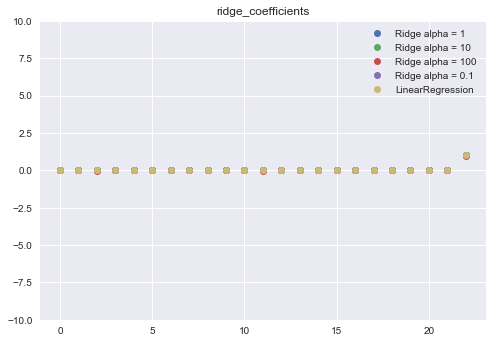

In [116]:
# we can get more insight into how the alpha parameter changes the model by inspecting
# the coef_ attribute of models with different values of alpha.
# A higher alpha means more restricted model, so we expect that the entries
# of coef_ have smaller magnitude for a higher value of alpha than for a low value
# of alpha

plt.title("ridge_coefficients")
plt.plot(ridge.coef_, 'o', label = 'Ridge alpha = 1')
plt.plot(ridge10.coef_, 'o', label = 'Ridge alpha = 10')
plt.plot(ridge100.coef_, 'o', label = 'Ridge alpha = 100')
plt.plot(ridge01.coef_, 'o', label = 'Ridge alpha = 0.1')

plt.plot(lr.coef_, 'o', label = 'LinearRegression')
plt.ylim(-10,10)
plt.legend()
plt.show()

In [118]:
# using lasso, an alternative to ridge for regularization linear regression

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, Y_train)
print ("training set score: %f" % lasso.score(X_train, Y_train))
print ("test set score: %f" % lasso.score(X_test, Y_test))
print ("number of features used: %d" % np.sum(lasso.coef_ != 0))

training set score: 0.999902
test set score: 0.999901
number of features used: 1


In [119]:
help (lasso)

Help on Lasso in module sklearn.linear_model.coordinate_descent object:

class Lasso(ElasticNet)
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, optional
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
 |      Given this, you should use the :class:`LinearRegression` object.
 |  
 |  fit_intercept : boolean
 |      whether to calculate the intercept for this model. If set
 |    

In [122]:
help (lr)

Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional
 |      whether to calculate the intercept for this model. If set
 |      to false, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      If True, the regressors X will be normalized before regression.
 |      This parameter is ignored when `fit_intercept` is set to False.
 |      When the regressors are normalized, note that this makes the
 |      hyperparameters learnt more robust and almost independent of the number
 |      of samples. The same property is not valid for standardized data.
 |      However, if you wish to standardize, please use
 |      `preprocessing.StandardScaler` before calling `fit` on an estimator
 |      wit

In [123]:
# lasso also has a regularization parameter alpha that controls how strongly
# codfficients are pushed to zero

lasso001 = Lasso(alpha = 0.01).fit(X_train, Y_train)
print ("training set score: %f" % lasso001.score(X_train, Y_train))
print ("test set score: %f" % lasso001.score(X_test, Y_test))
print ("number of features used: %d" % np.sum(lasso001.coef_ != 0))

training set score: 1.000000
test set score: 1.000000
number of features used: 1


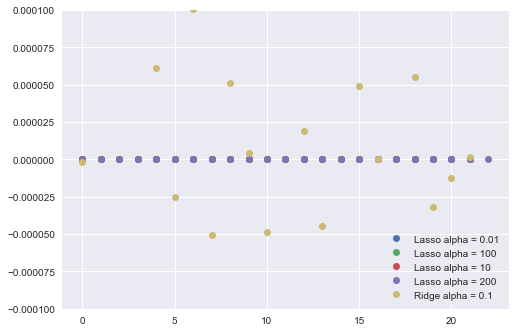

In [131]:
lasso001 = Lasso(alpha = 0.01).fit(X_train, Y_train)
lasso100 = Lasso(alpha = 100).fit(X_train, Y_train)
lasso10 = Lasso(alpha = 10).fit(X_train, Y_train)
lasso200 = Lasso(alpha = 200).fit(X_train, Y_train)

plt.plot(lasso001.coef_, 'o', label = "Lasso alpha = 0.01")
plt.plot(lasso100.coef_, "o", label = 'Lasso alpha = 100')
plt.plot(lasso10.coef_, 'o', label = "Lasso alpha = 10")
plt.plot(lasso200.coef_, 'o', label = "Lasso alpha = 200")

plt.plot(ridge01.coef_, 'o', label = 'Ridge alpha = 0.1')
plt.ylim(-0.0001,0.0001)
plt.legend()
plt.show()

In [132]:
# for logisticRegression and linearSVC the trade-off parameter that
# determines the strength of the regularization is called C, and higher values of
# C correspond to less regularization. That is, when using a high value of
# the parameter C, logisticRegression and LinearSVC try to fit the training set
# as best as possible, while with low values of the parameter C, the model put more 
# emphasis on finding a coefficient vector w that is closer to zero.
# using low values of C will cause the algorithms try to adjust to the majority
# of data points

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(file, file['Scores'], random_state = 7)

logres = LogisticRegression().fit(X_train, Y_train)

print ('training set score: %f' % logres.score(X_train, Y_train))
print ('test set score: %f' % logres.score(X_test, Y_test))
# default value of C is 1

training set score: 0.933333
test set score: 0.000000


In [134]:
# using C = 10

logres10 = LogisticRegression(C = 10).fit(X_train, Y_train)

print ('training set score: %f' % logres10.score(X_train, Y_train))
print ('test set score: %f' % logres10.score(X_test, Y_test))

training set score: 1.000000
test set score: 0.040000


In [135]:
logres001 = LogisticRegression(C = 0.01).fit(X_train, Y_train)

print ('training set score: %f' % logres001.score(X_train, Y_train))
print ('test set score: %f' % logres001.score(X_test, Y_test))

training set score: 0.226667
test set score: 0.000000


In [136]:
logres01 = LogisticRegression(C = 0.1).fit(X_train, Y_train)

print ('training set score: %f' % logres01.score(X_train, Y_train))
print ('test set score: %f' % logres01.score(X_test, Y_test))

training set score: 0.573333
test set score: 0.000000


In [138]:
logres50 = LogisticRegression(C = 50).fit(X_train, Y_train)

print ('training set score: %f' % logres50.score(X_train, Y_train))
print ('test set score: %f' % logres50.score(X_test, Y_test))

training set score: 1.000000
test set score: 0.040000


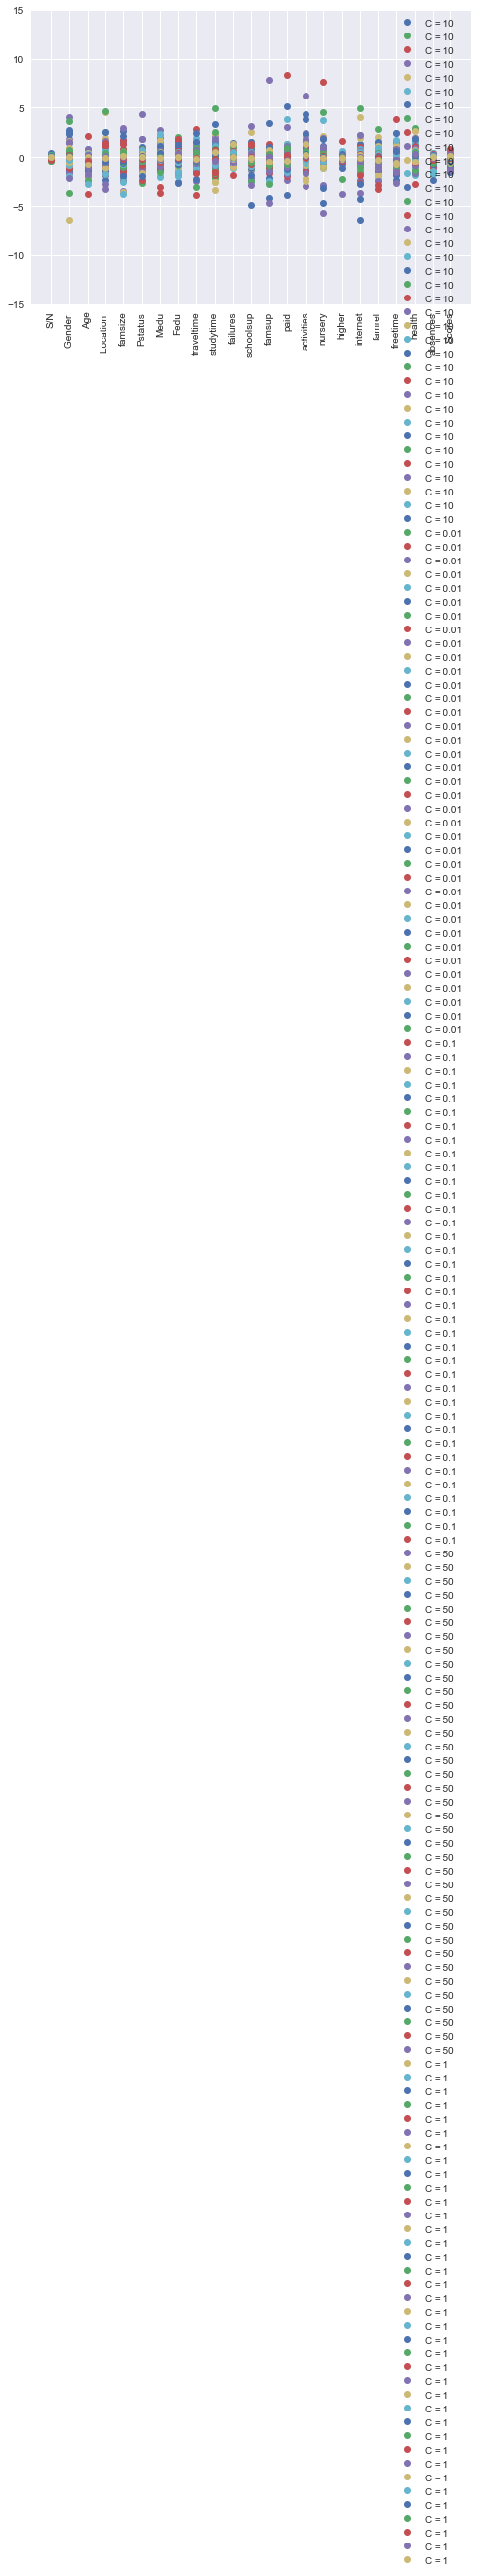

In [144]:
plt.plot(logres10.coef_.T, 'o', label = "C = 10")
plt.plot(logres001.coef_.T, 'o', label = "C = 0.01")
plt.plot(logres01.coef_.T, 'o', label = "C = 0.1")
plt.plot(logres50.coef_.T, 'o', label = "C = 50")
plt.plot(logres.coef_.T, 'o', label = "C = 1")

plt.xticks(range(file.shape[1]), file.keys(), rotation = 90)
plt.ylim(-15,15)
plt.legend()
plt.show()

training accuracy of L1 logreg with C =0.001000: 0.093333
test accuracy of L1 logreg with C =0.001000: 0.000000
training accuracy of L1 logreg with C =1.000000: 0.720000
test accuracy of L1 logreg with C =1.000000: 0.000000
training accuracy of L1 logreg with C =100.000000: 1.000000
test accuracy of L1 logreg with C =100.000000: 0.040000


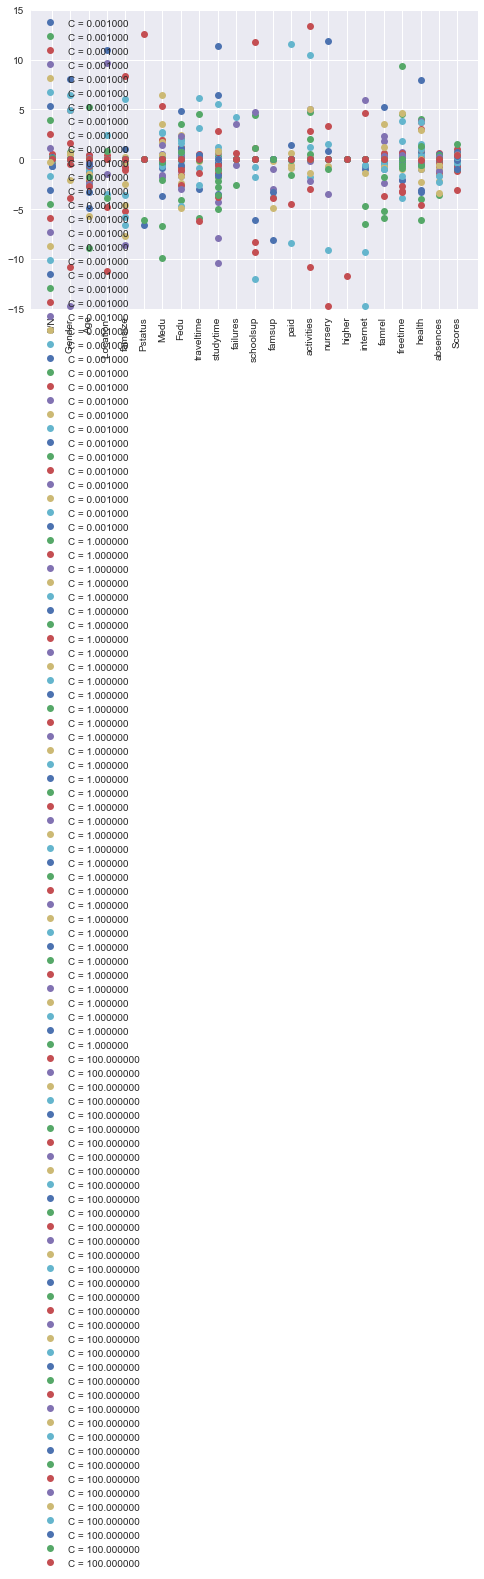

In [153]:
from sklearn.linear_model import LogisticRegression
#log = LogisticRegression()
for C in [0.001,1,100]:
    lr_l1 =LogisticRegression(C= C, penalty = 'l1').fit(X_train, Y_train)
    print ("training accuracy of L1 logreg with C =%f: %f" % (C, lr_l1.score(X_train, Y_train)))
    print ("test accuracy of L1 logreg with C =%f: %f" % (C, lr_l1.score(X_test, Y_test)))
    plt.plot(lr_l1.coef_.T, "o", label = "C = %f" % C)
    
plt.xticks(range(file.shape[1]), file.keys(), rotation = 90)

plt.ylim(-15,15)
plt.legend(loc = 2)
plt.show()

In [150]:
help (LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.feature_selection.from_model._LearntSelectorMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and 

In [154]:
# linear models for multiclass classification
# using the one-vs-approach.
# in the one-vs-rest approach, a binary model is learned for each
# class which tries to separate this class from all of the other classes,
# resulting in as many binary models as there are classes.


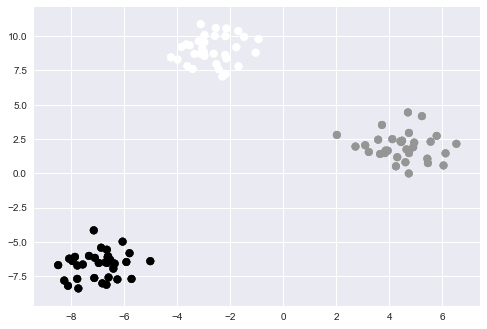

In [156]:
# Applying the one-vs-rest method to a simple three-class classification dataset.

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state = 42)

plt.scatter(X[:,0], X[:,1], c = y, s = 60)
plt.show()

In [163]:
# now training a LinearSVC classifier on the dataset

from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
linear_svm = svc.fit(X,y)

print (linear_svm.coef_.shape)
print (linear_svm.intercept_.shape)

(3, 2)
(3,)


C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


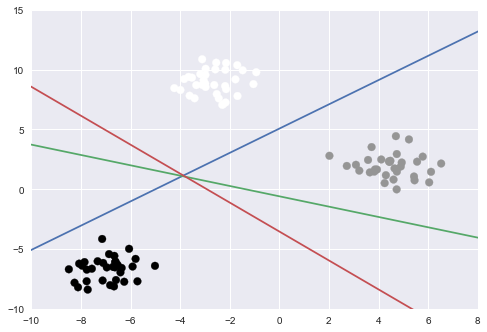

In [166]:
plt.scatter(X[:,0], X[:,1], c= y, s = 60)
line = np.linspace(-15,15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line *coef[0] + intercept)/coef[1])
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.legend()
plt.show()

In [167]:
# the main parameter of linear models is the regularization parameter, called
# alpha in the regression models and C in LinearSVC and LogisticRegression, 
# Large alpha or small C means simple models. 

In [168]:
# other decisions you have to make is whether you want to use L1 
# regularization or L2 regularization. If you assume that only few of 
# your features are acutally important, you should use L1. Otherwise, you 
# should default to L2.

In [169]:
# L1 can also be useful if interpretability of the model is important. As L1 will use only a few features.

NameError: name 'Classifier' is not defined